# 04 Machine Learning

Train and evaluate Logistic Regression, Random Forest, Gradient Boosting, and Decision Tree models.

In [1]:
from pathlib import Path
import sys

root = Path('..').resolve()
sys.path.append(str(root / 'src'))

from modeling import load_and_preprocess, build_and_evaluate

data_path = root / 'data' / 'raw' / 'ibm_hr_attrition.csv'
X, y, categorical_cols, numerical_cols = load_and_preprocess(data_path)
build_and_evaluate(X, y, categorical_cols, numerical_cols, output_dir=root / 'reports', run_grid_search=True, run_ablation=True)



--- Logistic Regression Grid Search (SMOTE) ---


Best params: {'classifier__C': 0.1}
Best CV F1: 0.530

--- Random Forest Grid Search (SMOTE) ---


Best params: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best CV F1: 0.499

--- Gradient Boosting Grid Search (SMOTE) ---


Best params: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
Best CV F1: 0.538

--- Decision Tree Grid Search (SMOTE) ---


Best params: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}
Best CV F1: 0.394



--- Logistic Regression (with SMOTE) ---
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       247
           1       0.42      0.64      0.50        47

    accuracy                           0.80       294
   macro avg       0.67      0.73      0.69       294
weighted avg       0.84      0.80      0.82       294


--- Random Forest (with SMOTE) ---


              precision    recall  f1-score   support

           0       0.88      0.95      0.91       247
           1       0.54      0.30      0.38        47

    accuracy                           0.85       294
   macro avg       0.71      0.62      0.65       294
weighted avg       0.82      0.85      0.83       294


--- Gradient Boosting (with SMOTE) ---


              precision    recall  f1-score   support

           0       0.87      0.96      0.92       247
           1       0.57      0.26      0.35        47

    accuracy                           0.85       294
   macro avg       0.72      0.61      0.63       294
weighted avg       0.82      0.85      0.83       294


--- Decision Tree (with SMOTE) ---
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       247
           1       0.49      0.38      0.43        47

    accuracy                           0.84       294
   macro avg       0.69      0.65      0.67       294
weighted avg       0.82      0.84      0.83       294


--- Logistic Regression (no SMOTE) ---
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.74      0.36      0.49        47

    accuracy                           0.88       294
   macro avg       0.81      0.67      0.71       29

(Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num', StandardScaler(),
                                                   ['Age', 'DailyRate',
                                                    'DistanceFromHome',
                                                    'Education',
                                                    'EnvironmentSatisfaction',
                                                    'HourlyRate',
                                                    'JobInvolvement', 'JobLevel',
                                                    'JobSatisfaction',
                                                    'MonthlyIncome',
                                                    'MonthlyRate',
                                                    'NumCompaniesWorked',
                                                    'PercentSalaryHike',
                                                    'PerformanceRating',
                           

### Model Metrics
Metrics are saved to `../reports/results/model_metrics.csv`.

In [2]:
import pandas as pd
metrics_path = Path('..') / 'reports' / 'results' / 'model_metrics.csv'
metrics = pd.read_csv(metrics_path)
metrics


,model,label,precision,recall,f1_score,support
0,logistic_regression,0,0.923423,0.829960,0.874200,247.0
1,logistic_regression,1,0.416667,0.638298,0.504202,47.0
2,logistic_regression,macro avg,0.670045,0.734129,0.689201,294.0
3,logistic_regression,weighted avg,0.842411,0.799320,0.815051,294.0
4,random_forest,0,0.876866,0.951417,0.912621,247.0
5,random_forest,1,0.538462,0.297872,0.383562,47.0
6,random_forest,macro avg,0.707664,0.624645,0.648092,294.0
7,random_forest,weighted avg,0.822767,0.846939,0.828044,294.0
8,gradient_boosting,0,0.871795,0.963563,0.915385,247.0
9,gradient_boosting,1,0.571429,0.255319,0.352941,47.0


### Model Selection Summary

In [3]:
grid_summary_path = Path('..') / 'reports' / 'results' / 'gridsearch_summary.csv'
cv_path = Path('..') / 'reports' / 'results' / 'cv_f1_scores.csv'
grid_summary = pd.read_csv(grid_summary_path)
cv_scores = pd.read_csv(cv_path)
summary = grid_summary.merge(cv_scores, on='model', how='left')
summary


,model,best_cv_f1,best_params,cv_f1_mean,cv_f1_std
0,logistic_regression,0.530376,{'classifier__C': 0.1},0.510080,0.030365
1,random_forest,0.498549,"{'classifier__max_depth': None, 'classifier__m...",0.464429,0.084518
2,gradient_boosting,0.538452,"{'classifier__learning_rate': 0.1, 'classifier...",0.529575,0.075982
3,decision_tree,0.394045,"{'classifier__max_depth': 5, 'classifier__min_...",0.434984,0.099335


### Grid Search Results (Top 5 by CV F1)

In [4]:
grid_files = [
    'logistic_regression_gridsearch.csv',
    'random_forest_gridsearch.csv',
    'gradient_boosting_gridsearch.csv',
    'decision_tree_gridsearch.csv',
]
for name in grid_files:
    grid_path = Path('..') / 'reports' / 'results' / name
    grid_results = pd.read_csv(grid_path)
    display(grid_results[['params', 'mean_test_score']].sort_values('mean_test_score', ascending=False).head(5))


,params,mean_test_score
0,{'classifier__C': 0.1},0.530376
1,{'classifier__C': 1.0},0.526358
2,{'classifier__C': 10.0},0.516781


,params,mean_test_score
5,"{'classifier__max_depth': None, 'classifier__m...",0.498549
13,"{'classifier__max_depth': 10, 'classifier__min...",0.497608
12,"{'classifier__max_depth': 10, 'classifier__min...",0.492150
4,"{'classifier__max_depth': None, 'classifier__m...",0.488962
10,"{'classifier__max_depth': 10, 'classifier__min...",0.482863


,params,mean_test_score
7,"{'classifier__learning_rate': 0.1, 'classifier...",0.538452
4,"{'classifier__learning_rate': 0.1, 'classifier...",0.537847
1,"{'classifier__learning_rate': 0.05, 'classifie...",0.528122
5,"{'classifier__learning_rate': 0.1, 'classifier...",0.522356
6,"{'classifier__learning_rate': 0.1, 'classifier...",0.519988


,params,mean_test_score
17,"{'classifier__max_depth': 5, 'classifier__min_...",0.394045
9,"{'classifier__max_depth': 5, 'classifier__min_...",0.390776
12,"{'classifier__max_depth': 5, 'classifier__min_...",0.389750
16,"{'classifier__max_depth': 5, 'classifier__min_...",0.388837
15,"{'classifier__max_depth': 5, 'classifier__min_...",0.388837


### Confusion Matrices

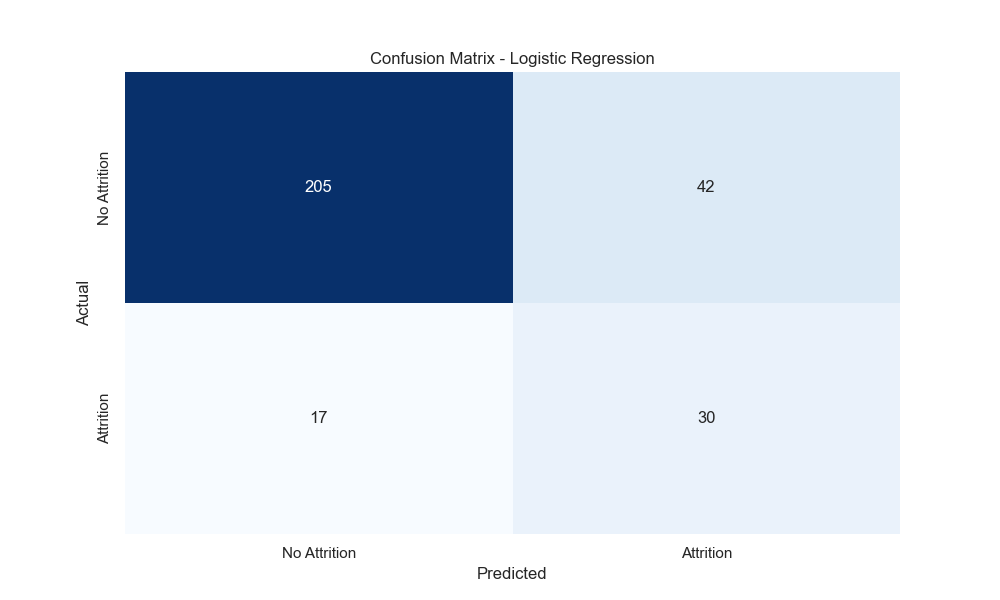

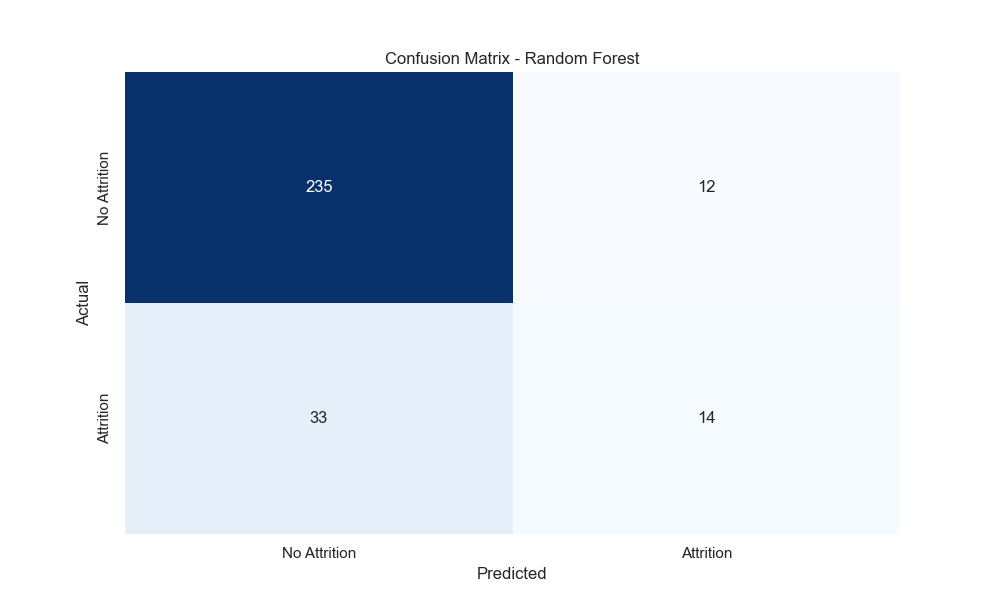

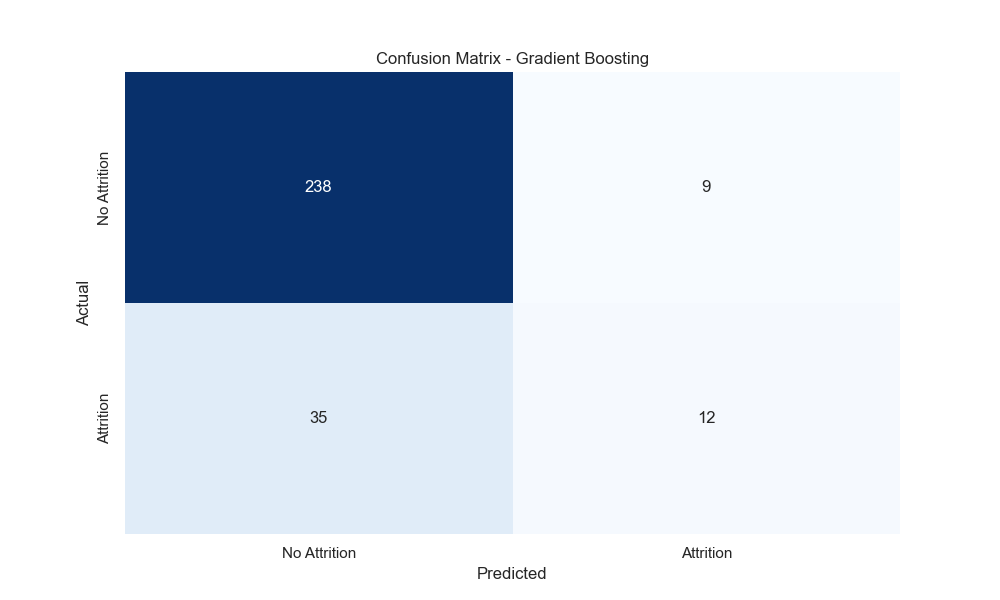

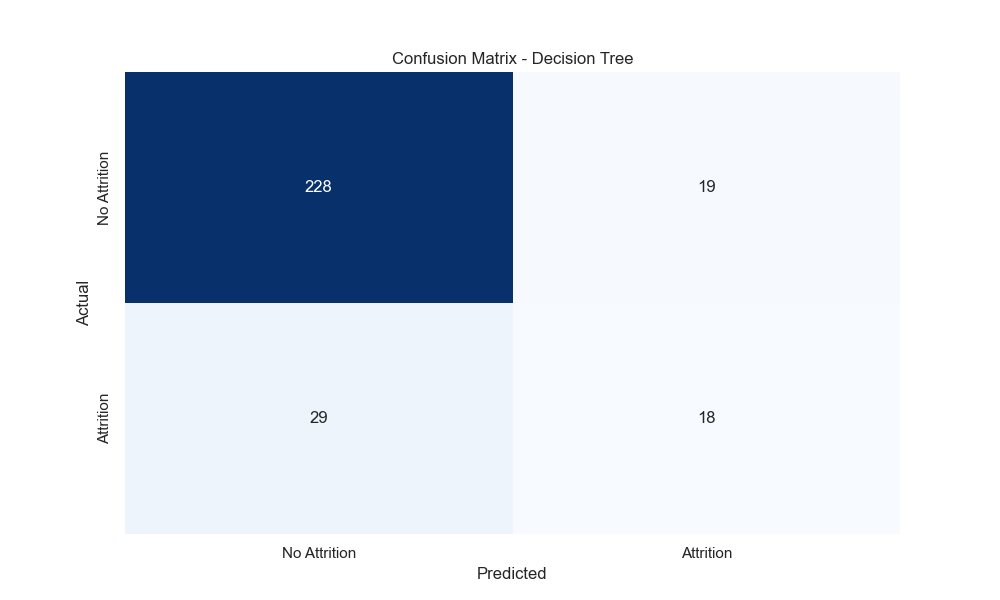

In [5]:
from IPython.display import Image, display
cm_files = [
    'cm_logistic_regression.png',
    'cm_random_forest.png',
    'cm_gradient_boosting.png',
    'cm_decision_tree.png',
]
for name in cm_files:
    display(Image(filename=str(Path('..') / 'reports' / name)))


### ROC & Precision-Recall Curves

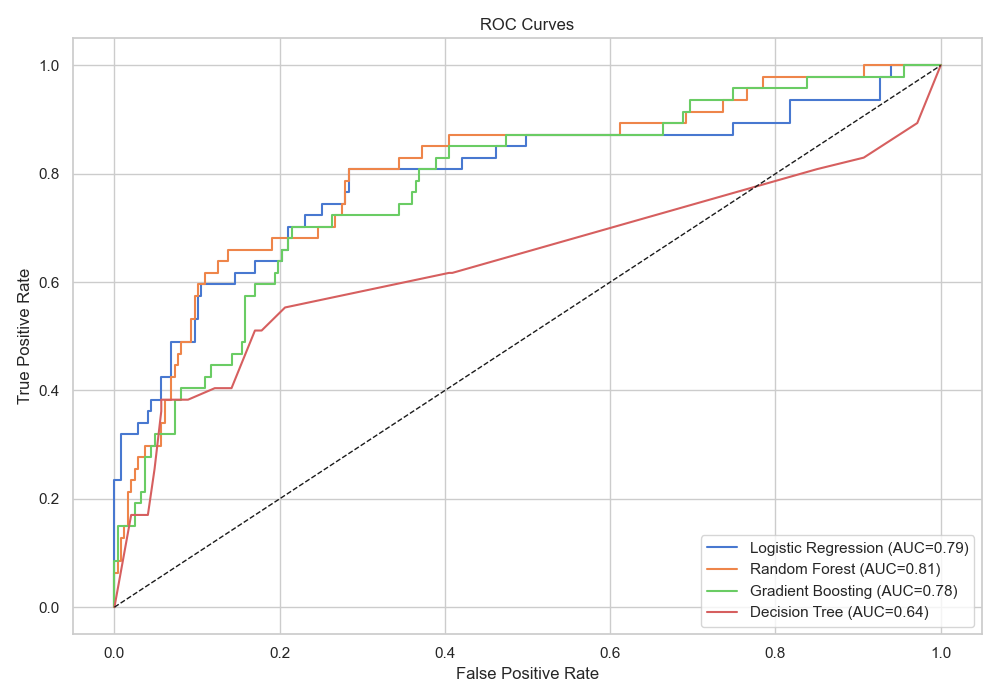

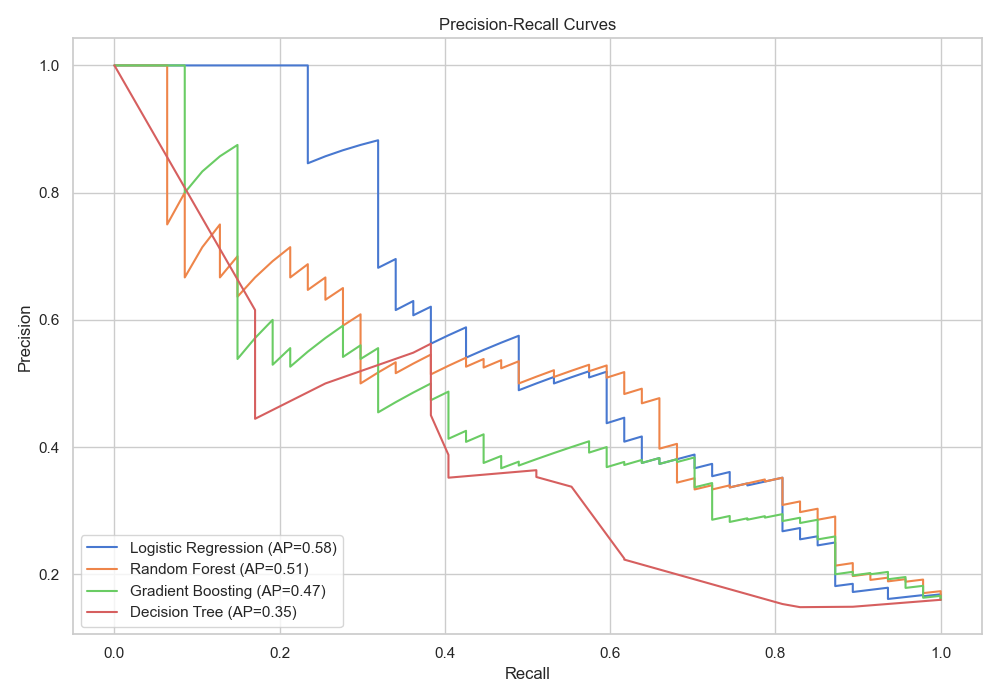

In [6]:
curve_files = ['roc_curves.png', 'pr_curves.png']
for name in curve_files:
    display(Image(filename=str(Path('..') / 'reports' / name)))


### Threshold Tradeoff

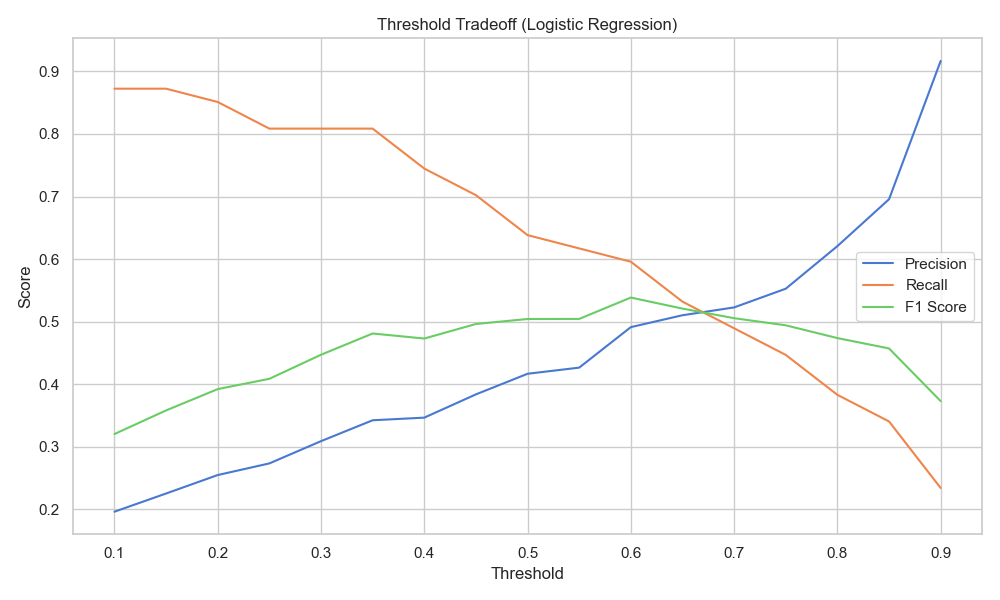

In [7]:
display(Image(filename=str(Path('..') / 'reports' / 'threshold_tradeoff.png')))

### Cost-Based Threshold Curve

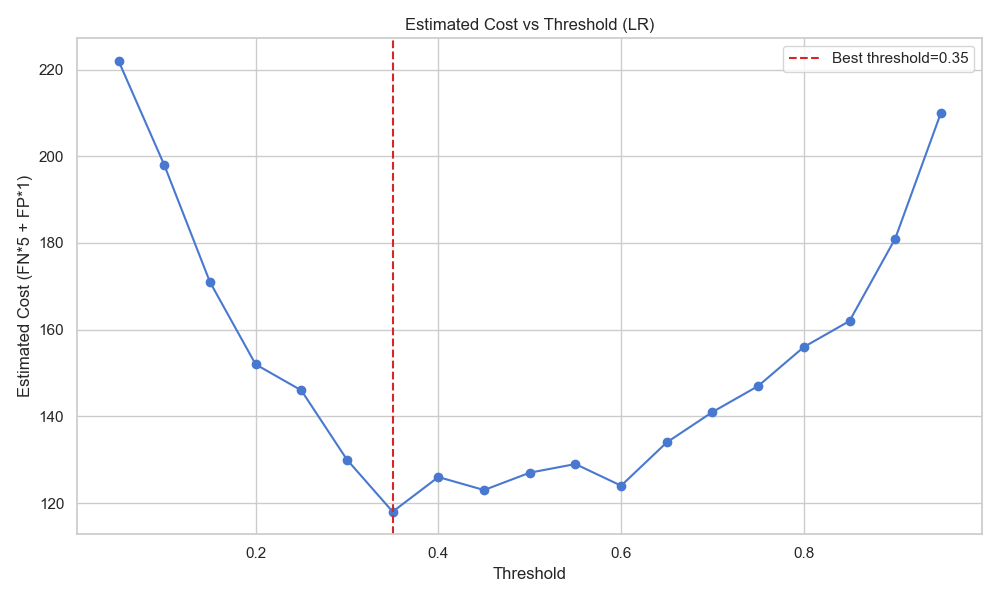

In [8]:
display(Image(filename=str(Path('..') / 'reports' / 'threshold_cost_curve.png')))

### SMOTE Ablation

In [9]:
ablation_path = Path('..') / 'reports' / 'results' / 'ablation_smote.csv'
ablation = pd.read_csv(ablation_path)
ablation


,model,label,precision,recall,f1_score,support
0,logistic_regression_smote,0,0.923423,0.829960,0.874200,247.0
1,logistic_regression_smote,1,0.416667,0.638298,0.504202,47.0
2,logistic_regression_smote,macro avg,0.670045,0.734129,0.689201,294.0
3,logistic_regression_smote,weighted avg,0.842411,0.799320,0.815051,294.0
4,logistic_regression_no_smote,0,0.889299,0.975709,0.930502,247.0
5,logistic_regression_no_smote,1,0.739130,0.361702,0.485714,47.0
6,logistic_regression_no_smote,macro avg,0.814215,0.668705,0.708108,294.0
7,logistic_regression_no_smote,weighted avg,0.865292,0.877551,0.859396,294.0


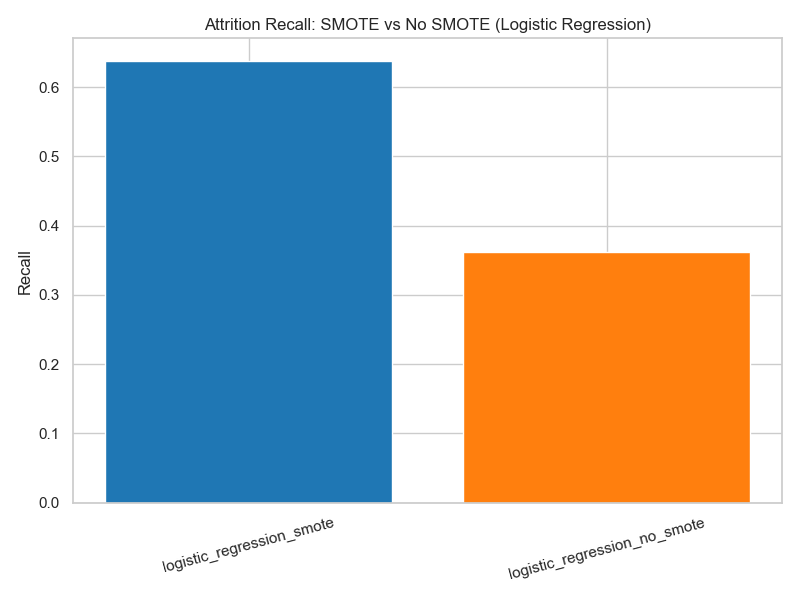

In [10]:
display(Image(filename=str(Path('..') / 'reports' / 'ablation_smote_recall.png')))

### Interpretability

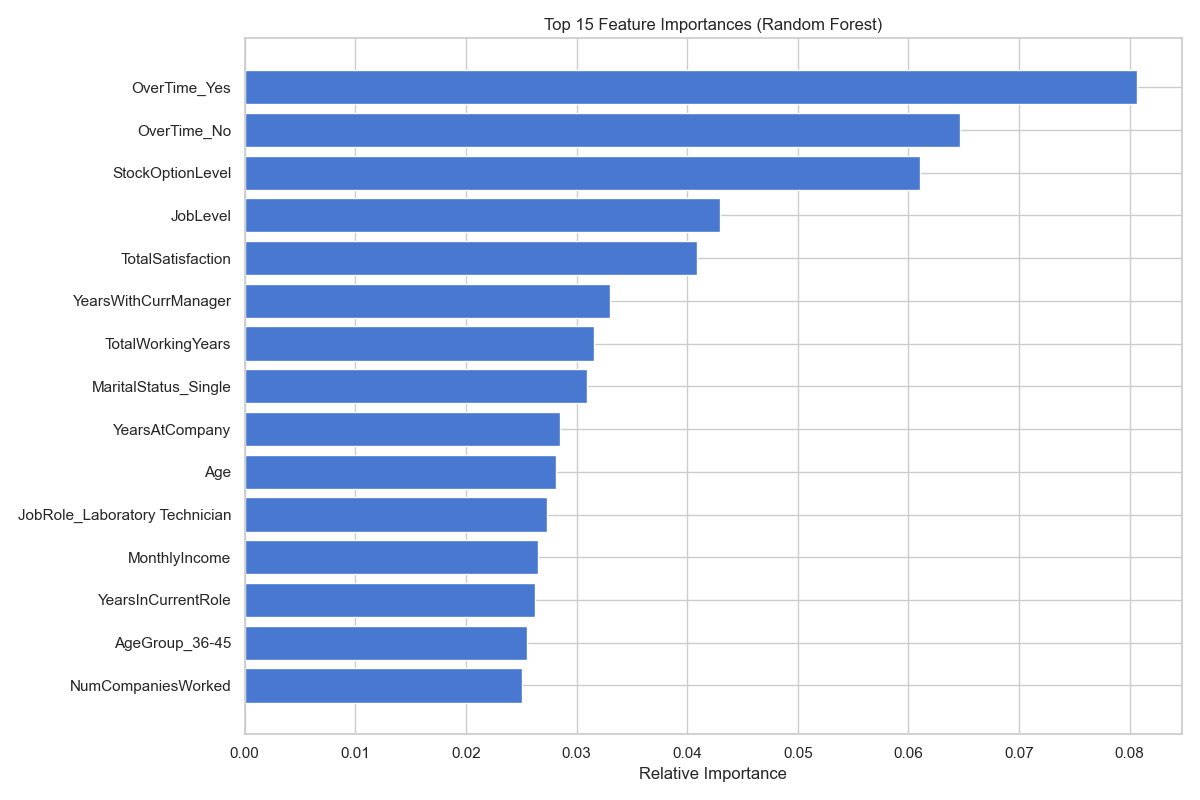

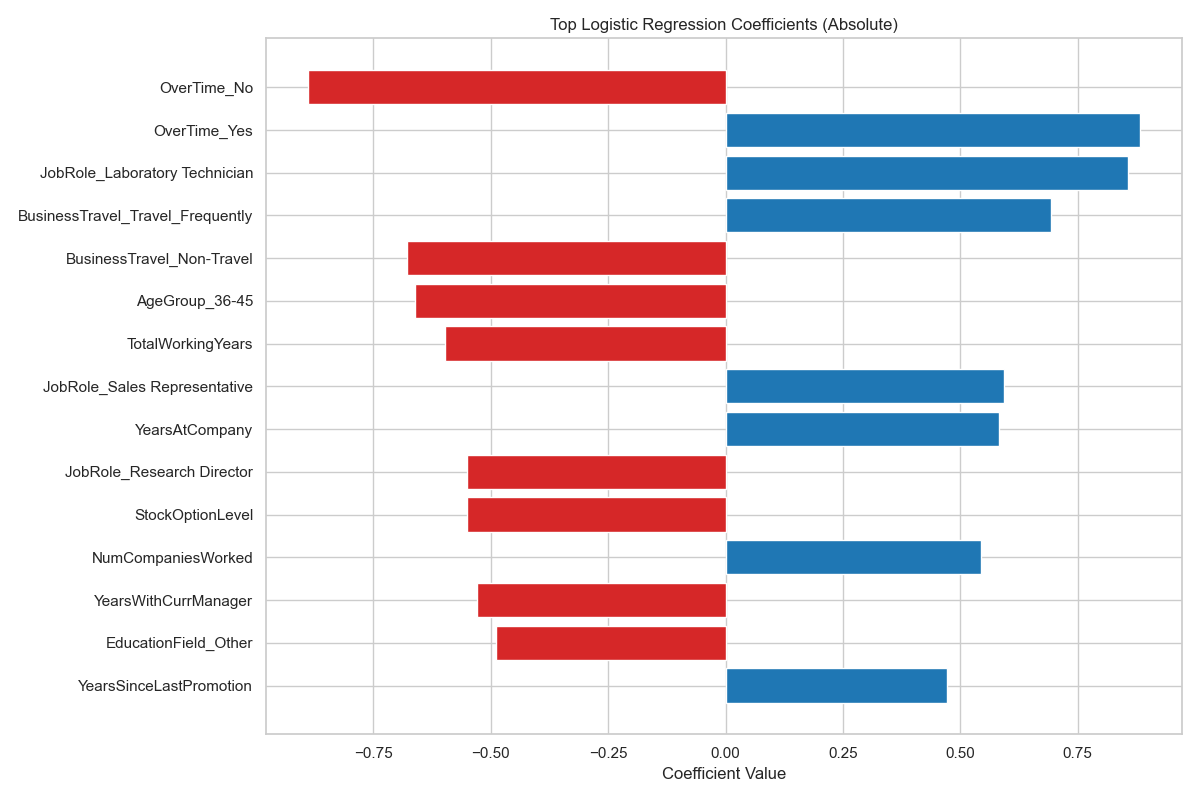

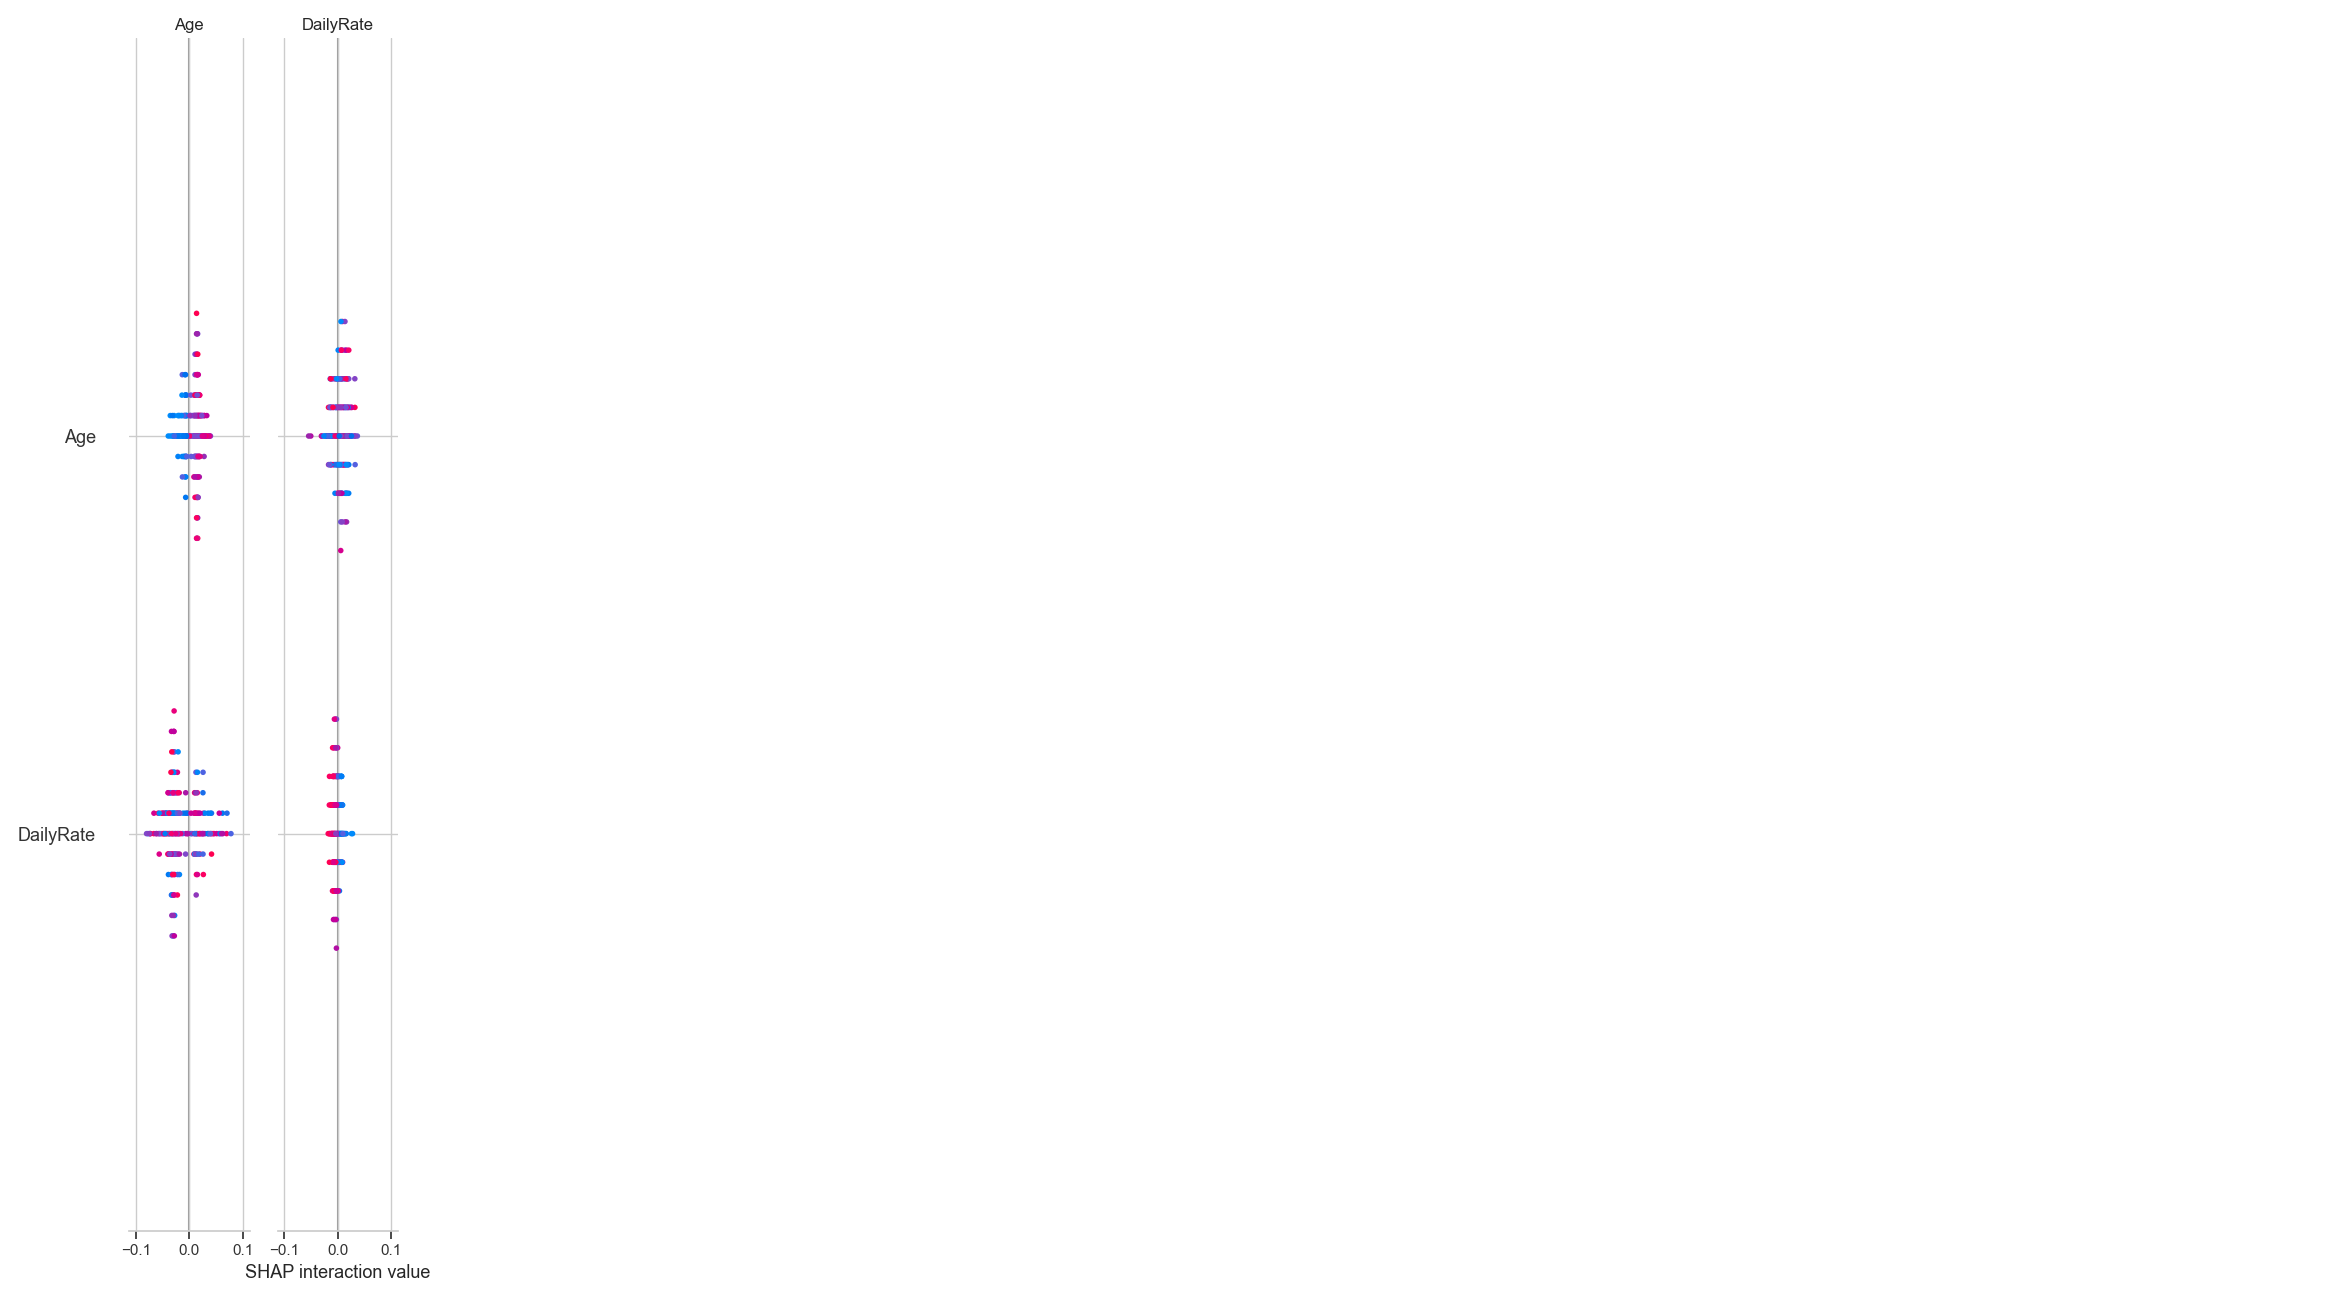

In [11]:
interp_files = ['feature_importance_rf.png', 'logistic_coefficients.png', 'shap_summary_rf.png']
for name in interp_files:
    display(Image(filename=str(Path('..') / 'reports' / name)))


### Summary
- Logistic Regression yields the highest recall for attrition.
- Decision Tree provides a balance between recall and interpretability.
- Random Forest and Gradient Boosting deliver higher accuracy but lower attrition recall.
- SMOTE improves attrition recall at the cost of overall accuracy.
- Cost-based threshold curve shows the tradeoff between FN and FP business costs.
